## The wonderful 2 dimensional bandstructure function
 **Autors:** *Klára Nováková* and *Andris Potrebko* with a vital teoretical support of *Andreas Wacker*, *Tor Sjöstrand* and *Hofmanns* book *Solid State Physics*     
 **Year:** *2019* 
 
* If you are looking at this file from the universities computer which is used for the lab, then please leave everything exactly the way it was before.

* The file is structured to be able to run cell by cell. If any of the variable is unclear, it is possible to create a new cell by pressing *Esc* and then *A* and play around. The shortcut to delete the cell: *Esc* and then *D+D*.

* In the following document, the two dimensional bandstructure of a crystal is solved using the plane wave basis approximation (further described in the lab manual).

* This time we will not care about the exact value of our potential which is now two dimensional. In analogy to the 1D case we write the potential in Fourier components  $V(\vec r)=\sum_{\vec{G_j}}A e^{- G^2_j \sigma^2/2} e^{i \vec{G_j}\cdot \vec r} \equiv  \sum
_{\vec G_j} V_{\vec G_j} \cdot e^{i \vec G_j
\cdot \vec r}$, where $\vec G_j$ is a reciprocal lattice vector and $\vec r=(x, y)$.

* In order to obtain the energy spectrum or the band structure we need to solve the following eigenvalue equation:
$\Big( \frac{\hbar^2 (\vec k+\vec K)^2}{2m} - \varepsilon \Big) c_{\vec k+\vec K} +\sum_G c_{\vec k+\vec K-\vec G} V_\vec G$ and search for $\varepsilon$ - the energy eigenvalues.



### Imports

In [1]:
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib

plt.style.use("default")


from matplotlib import cm

import panel as pn

### initial values

In [2]:
a = 3  # Latfice constant in Ångstrongs
sigma = 1  # Very arbitrary value
U = 15
Len_k = 15
A = -U*(np.sqrt(2 *np.pi)*sigma/a)**2
NrOfK = 5 #changed later

As mentioned in the lab manual, we only consider the reciprocal lattice vectors which fullfil the condition $|\vec k + \vec K + \vec G| \leq K_{max}$. In the figure below, we can see a $\vec k$ vector $(k_x,k_y)$ in the first Brillouin zone (yellow in the figure) and all of the zones, that we include in the calculations, that is all of the neigbouring zones. Two examples of the possible reciprocal lattice vectors $\vec G$ are shown which can be added to the vector $\vec k$ while fulling the condition mentioned.

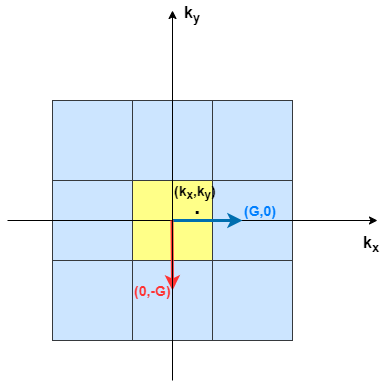

In [3]:
G = 2*np.pi/a
G_list = np.array([[-G, G], [-G, 0.0], [-G, -G], [0.0, G],
                   [0.0, 0.0], [0.0, -G], [G, G], [G, 0.0], [G, -G]])
# G_list=np.array([[-G,0.0],[0.0,G],[0.0,0.0],[0.0,-G],[G,0.0]])
# G_list=np.array([[0.0,0.0],[G,0],[0,G],[G,G]])
NrOfK = len(G_list)

*BandStructureFunction_2D.ipynb* file contains a function *BandStructF* which creates the matrix described above and solves for the eigenvalues.
*%run* is one of the so-called magic functions and does the import of the function found in the file *BandStructureFunction_2D.ipynb*.

In [4]:
%run BandFunction_2D.ipynb

In [5]:
Energies = np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
kVect = np.zeros((2, Len_k*2+1, Len_k*2+1))

Uncomment "%%time" to measure the calculation time of the cell

In [6]:
# %%time
Energies = np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
kVect = np.zeros((2, Len_k*2+1, Len_k*2+1))

for kx in range(-Len_k, Len_k+1):
    for ky in range(-Len_k, Len_k+1):
        #         %run 2Dbandstructure.ipynb
        k_x = np.pi/(a)*kx/Len_k
        k_y = np.pi/(a)*ky/Len_k
        E = BandStructF()
        Energies[kx+Len_k, ky+Len_k] = np.real(E)

        kVect[0, kx+Len_k, ky+Len_k] = k_x
        kVect[1, kx+Len_k, ky+Len_k] = k_y

Energies0 = Energies[:, :, 0]
Energies1 = Energies[:, :, 1]

### Fermi energi
Define initial Fermi energy. This energy will be changed by the interaction later. For the given Fermi energy find how many states are bellow it

In [7]:
EF = -6
BellowF = np.sum(np.sort(Energies[0:2*Len_k,0:2*Len_k].flatten()) <= EF) #No double count at boundaries

EFermi = np.full((10, 10), EF)
kxFermi, kyFermi = np.meshgrid(np.linspace(kVect[0, 0, 0]*0.8, kVect[0, -1, -1]*1.01, 10),
                               np.linspace(kVect[0, 0, 0]*0.8, kVect[0, -1, -1]*1.01, 10))

### Plots
#### Plot one fourth of the Brilluin zone

We create variables containing energies values in the region we want to plot. Not that the new 2D arrays *Energies0In* and *Energies1In* created in this way in Python are not actually the new variables. Instead Python assigns a place in memory under the created variable names which is connected to the initial array *Energies0* and *Energies1*. This means that whenever *Energies0* or *Energies1* change, also *Energies0In* or *Energies1In* change automatically. In this way it is not needed to reasign the new variable everytime we will run the interaction.

In [8]:
kVectIn = kVect[:, Len_k:, Len_k:]
Energies0In = Energies0[Len_k:, Len_k:]
Energies1In = Energies1[Len_k:, Len_k:]
kxFermiIn, kyFermiIn, EFermiIn = kxFermi[4:,
                                         4:], kyFermi[4:, 4:], EFermi[4:, 4:]

In [9]:
%%capture

# To make different colors above/below the Fermi level
ColLow, ColAbove = Energies0.copy(), Energies1.copy()


def PlotFourth(EF, Energies0, Energies1, EFermi,ax, *args):
    # Make the colors change continuously (linearly) so that below EF it would be in interval (0;0.4) and above (0.6;1)
    # First find the slope
    slopeColorL = 0.4/(EF - np.min(Energies0In))
    slopeColorH = 0.4/(np.max(Energies1In) - EF)

    ColLow[Energies0 < EF] = slopeColorL * \
        (Energies[Energies0 < EF, 0]-np.min(Energies0))
    ColLow[Energies0 > EF] = 0.6 + slopeColorH * \
        (Energies[Energies0 > EF, 0] - EF)
    ColAbove[Energies1 < EF] = slopeColorL * \
        (Energies[Energies1 < EF, 0] - np.min(Energies0))
    ColAbove[Energies1 > EF] = 0.6 + slopeColorH * \
        (Energies[Energies1 > EF, 1] - EF)

    # Make the plot
    ax.plot_surface(kVectIn[0], kVectIn[1], Energies1In, facecolors=cm.plasma(ColAbove[Len_k:-1, Len_k:-1]),
                     edgecolor='none', antialiased=False, vmin=np.min(Energies), vmax=np.max(Energies1In))  # Energies[:,:,2]
    ax.plot_surface(kVectIn[0], kVectIn[1], Energies0In, vmin=np.min(Energies), vmax=np.max(Energies1In), rstride=1, cstride=1,
                     facecolors=cm.plasma(ColLow[Len_k:-1, Len_k:-1]), edgecolor='none', antialiased=False, zorder=3, shade=False)  # Energies[:,:,2]
    ax.plot_surface(kxFermiIn, kyFermiIn, EFermiIn, rstride=1, cstride=1, color='r',
                     edgecolor='none', antialiased=False, zorder=1, alpha=0.3)  # Energies[:,:,2]

    ax.set_xlabel('$k_x$ $(1/ \AA)$')
    ax.set_ylabel('$k_y$ $(1/ \AA)$')
    ax.set_zlabel('Energy (eV)')
    ax.set_zlim3d(np.min(Energies), np.max(Energies1In))
# cnar = fig.colorbar(C2)


#fig = plt.figure(figsize=plt.figaspect(0.5))
#ax2 = fig.add_subplot(1, 2, 2)
#ax1 = fig.add_subplot(1, 2, 1, projection='3d')
#fig.subplots_adjust(wspace=0.3)
#PlotFourth(EF, Energies0, Energies1, EFermi)

NameError: name 'ax1' is not defined

To plot the whole Brilluin zone

In [10]:
%%capture
# Make different colors above/below the Fermi level
ColLow, ColAbove = Energies0.copy(), Energies1.copy()


def PlotFull(EF, Energies0, Energies1, EFermi,ax ,*args):
    # Make the colors continuous so that below EF it would be in interval (0;0.4) and above (0.6;1)
    # First find the slope
    slopeColorL = 0.4/(EF - np.min(Energies0))
    slopeColorH = 0.4/(np.max(Energies1) - EF)

    ColLow[Energies0 < EF] = slopeColorL * \
        (Energies[Energies0 < EF, 0]-np.min(Energies0))
    ColLow[Energies0 > EF] = 0.6 + slopeColorH * \
        (Energies[Energies0 > EF, 0] - EF)
    ColAbove[Energies1 < EF] = slopeColorL * \
        (Energies[Energies1 < EF, 0] - np.min(Energies0))
    ColAbove[Energies1 > EF] = 0.6 + slopeColorH * \
        (Energies[Energies1 > EF, 1] - EF)

    # Make the plot
    ax.plot_surface(kxFermi, kyFermi, EFermi, rstride=1, cstride=1, color='r',
                     edgecolor='none', alpha=0.3, antialiased=False)  # Energies[:,:,2]
    ax.plot_surface(kVect[0], kVect[1], Energies1,
                     facecolors=cm.plasma(ColAbove), rstride=1, cstride=1,
                     edgecolor='none', antialiased=False)  # Energies[:,:,2]
    ax.plot_surface(kVect[0], kVect[1], Energies0, vmin=np.min(Energies), vmax=np.max(Energies1), rstride=1, cstride=1,
                     facecolors=cm.plasma(ColLow), edgecolor='none', antialiased=False)  # Energies[:,:,2]



    ax.set_xlabel('$k_x$ $(1/ \AA)$')
    ax.set_ylabel('$k_y$ $(1/ \AA)$')
    ax.set_zlabel('Energy (eV)')
    ax.set_zlim3d(np.min(Energies), np.max(Energies1))

# fig = plt.figure(figsize=plt.figaspect(0.5))
# ax2 = fig.add_subplot(1, 2, 2)
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# PlotFull(EF, Energies0, Energies1, EFermi)

NameError: name 'ax1' is not defined

### The energy bands
I wanted to put on the x axis the distance from the origin to the point, this is why all of the $\sqrt{k_x^2 + k_y^2}$ appear but it did not look pretty, so I multiply by 2

In [11]:
def BandStructure(EF,ax, *args):
    EnergyDiag = np.diag(Energies0[::-1, :])[:Len_k+1]
    EnergyDiag1 = np.diag(Energies1[::-1, :])[:Len_k+1]
    kDiag = kVect[1][0, Len_k:]*np.sqrt(2)

    ax.plot(1, 1, color='grey', label='First Band')
    ax.plot(1, 1, '--', color='grey', label='Second Band')

    # First Band
    ax.plot(kVect[0][Len_k:, 1], Energies0[Len_k:, Len_k])
    ax.plot(np.sqrt(kVect[0][-1, 1]**2 +
                     (kVect[1][-1, Len_k:])**2*3), Energies0[-1, Len_k:])
    ax.plot(kVect[0][-1, 1]*(2+kDiag), EnergyDiag)
    # ax2.plot(kVect[1][1,(Len_k+1):(2*Len_k+1)],Energies[(2*Len_k+1),(Len_k+1):(2*Len_k+1),1])

    # Second Band
    ax.plot(kVect[0][Len_k:, 1], Energies1[Len_k:, Len_k], '--')
    ax.plot(np.sqrt(kVect[0][-1, 1]**2+(kVect[1]
                                         [-1, Len_k:])**2*3), Energies1[-1, Len_k:], '--')
    ax.plot(kVect[0][-1, 1]*(2+kDiag), EnergyDiag1, '--')
    # ax2.plot(kVect[1][1,(Len_k+1):(2*Len_k+1)],Energies[(2*Len_k+1),(Len_k+1):(2*Len_k+1),1])

    ax.axhline(EF, linestyle='-.', alpha=0.8, color='gray', label='$E_F$')

    ax.set_xticks([0, kVect[0][-1, 1], kVect[0][-1, 1]
                    * 2, kVect[0][-1, 1]*2+kDiag[-1]])
    ax.set_xticklabels(('$\Gamma$', 'X', 'M', '$\Gamma$')) # previously (('X', '$\Gamma$', 'Y', 'X'))
    ax.tick_params(axis='x', colors='r', labelsize=16)
    #ax.yaxis.tick_right()
    #ax.yaxis.set_label_position("right")
    # ax2.set_xlabel('$k$') #$(1/ \AA)$
    ax.set_ylabel('Energy (eV)')
    ax.legend()




NameError: name 'ax2' is not defined

In [ ]:
# fig = plt.figure(figsize=plt.figaspect(0.5))
# ax2 = fig.add_subplot(1, 2, 2)
# BandStructure()
# fig

### Begin interaction
#### Note that we do not calculate the lattice anymore (kVect, ...), because the lattice does not change

In [ ]:


def f(Pot=U, FullOrFourth=1, EFerm=EF, *args):
    global A, kx, ky
    
    if (FullOrFourth=="Full"):
        FullOrFourth = 0
    else:
        FullOrFourth = 1
    
    fig = plt.figure(figsize=(6, 4),constrained_layout=True)
    ax2 = fig.add_subplot(1, 2, 1)
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    fig.patch.set_facecolor('white') 
    U = Pot
    EF = EFerm
    EFermi[:, :] = EF
    A = -U*(np.sqrt(2 *np.pi)*sigma/a)**2
    for kx in range(-Len_k, Len_k+1):
        for ky in range(-Len_k, Len_k+1):
            E = BandStructF()
            Energies[kx+Len_k, ky+Len_k] = np.real(E)
    

    Energies0 = Energies[:, :, 0]
    Energies1 = Energies[:, :, 1]
    EFermi[:, :] = EF
    if FullOrFourth:
        PlotFourth(EF, Energies0, Energies1, EFermi,ax1)
    else:
        PlotFull(EF, Energies0, Energies1, EFermi,ax1)

    BandStructure(EF,ax2)

#     DebugGuy.value = str(EF)

    # Update the value of the number of states bellow Fermi to be printed out
    BellowF = np.sum(np.sort(Energies[0:2*Len_k,0:2*Len_k].flatten()) <= EF)#No double count at boundaries

    output_int.object = r"Number of states bellow $E_F$ is:" + str(BellowF)
    ax1.set(facecolor = "white")
    ax2.set(facecolor = "white")
    #ax1.set_axis_bgcolor('white')
    #ax2.set_axis_bgcolor('white')
    plt.close(fig)  
    return fig

In [ ]:


pn.extension()

output_int = pn.pane.Str(r"Number of states bellow $E_F$ is:")
freq = pn.widgets.FloatSlider(name='Potential', start=0.0, end=100, step=1, value=U)
amp = pn.widgets.FloatSlider(name=r'$E_F$', start=int(np.min(Energies0)), end=int(np.max(Energies1))+2, step=1, value=EF)
mode = pn.widgets.Select(name='Full plot or 1/4', options=["Full", "1/4"], value="1/4")

interactive = pn.bind(f, Pot=freq,FullOrFourth=mode,EFerm=amp)



#pn.Column(freq, amp, interactive)

sliders_layout = pn.Column(
    pn.Row(freq, amp),
    pn.Row(mode,output_int)  # dropdown with 2nd row
)

ui = pn.Column(
    sliders_layout,
    pn.panel(interactive, tight=True)
)




